<a href="https://colab.research.google.com/github/khanh22mse23057/python4engineer-assignments/blob/main/Assignments2_Overview%20M5-EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#M5-EDA : Tìm hiểu các vẽ các dạng biểu đồ

## Cài đặt môi trường

In [ ]:
# Một số functions trong bài không work với latest version, nên cài đặt packages version chỉ định như sau
!pip install opendatasets
!pip install pandas==1.2.0
!pip install pystan==3.0.0

!pip install kaggle
!pip install unzip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 31.7 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41.9 MB 1.6 MB/s 
     |████████████████████████████████| 1.8 MB 54.1 MB/s 
  Attempting uninstall: webargs
    Found existing installation: webargs 8.2.0
    Uninstalling webargs-8.2.0:
      Successfully uninstalled webargs-8.2.0
  Attempting uninstall: httpstan
    Found existing installation: httpstan 4.6.1
    Uninstalling httpstan-4.6.1:
      Successfully uninstalled httpstan-4.6.1
  Attempting uninstall: pystan
    Found existing installatio

### Import dữ liệu train

In [ ]:
import os
#Cấu hình secret key để xác thực truy cập đến Kaggle trên môi trường
os.environ['KAGGLE_USERNAME'] = 'khanhphamnguyenphu'
os.environ['KAGGLE_KEY'] = '67b96e181bd01730f8e8ec3cf2b685a7'

!if [ -d ~/.kaggle/ ]; then rm -Rf ~/.kaggle/; fi
!if [ -d ./kaggle/input/ ]; then rm -Rf ./kaggle/input/; fi

!kaggle competitions download -c m5-forecasting-accuracy -p ./kaggle/input/ # Download dữ liệu train từ Kaggle
!unzip  ./kaggle/input/*.zip -d ./kaggle/input/
!ls ./kaggle/input/ 

 72% 33.0M/45.8M [00:00<00:00, 82.1MB/s]
100% 45.8M/45.8M [00:00<00:00, 89.9MB/s]
Archive:  ./kaggle/input/m5-forecasting-accuracy.zip
  inflating: ./kaggle/input/calendar.csv  
  inflating: ./kaggle/input/sales_train_evaluation.csv  
  inflating: ./kaggle/input/sales_train_validation.csv  
  inflating: ./kaggle/input/sample_submission.csv  
  inflating: ./kaggle/input/sell_prices.csv  
calendar.csv		     sales_train_evaluation.csv  sample_submission.csv
m5-forecasting-accuracy.zip  sales_train_validation.csv  sell_prices.csv


In [ ]:
import pandas as pd
#Đọc dữ liệu train vào pandas dataframes
sale2 = pd.read_csv('/content/kaggle/input/sales_train_validation.csv')
cale4 = pd.read_csv('/content/kaggle/input/calendar.csv')
prices = pd.read_csv("/content/kaggle/input/sell_prices.csv")

#Kiểm tra lại dữ liệu đã đọc
sale2.info()
cale4.info()
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1919 entries, id to d_1913
dtypes: int64(1913), object(6)
memory usage: 446.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   event_name_2  5 non-null      object
 10  event_type_2  5 non-null      object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 215.5+ KB
<c

In [ ]:
import datetime
x = datetime.date(2011,1,29)
for c in ((sale2.columns)[6:]):
    sale2.rename(columns={c:x},inplace=True)
    x = x + datetime.timedelta(days=1)

# Các loại biểu đồ


### *1.Biểu đồ hiện thị 5 sản đầu theo chuỗi thời gian*


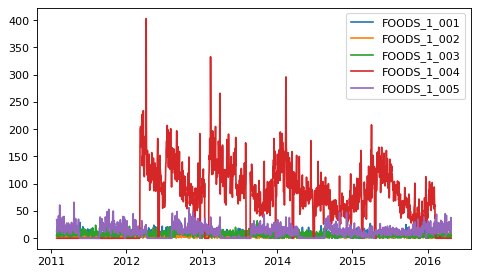

In [ ]:
X = sale2.groupby('item_id')[(sale2.columns)[6:]].sum()
import matplotlib.pyplot as plt
plt.figure(num=None, figsize=(7, 4), dpi=80, facecolor='w', edgecolor='k')
for i in range(5):
    plt.plot(X.iloc[i,:],label=X.index[i])
    plt.legend(loc='best')
plt.show()

### *2. Biểu đồ tổng doanh thu theo chuỗi thời gian*


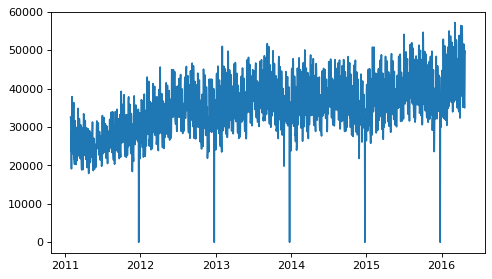

In [ ]:
plt.figure(num=None, figsize=(7, 4), dpi=80, facecolor='w', edgecolor='k')
(X.sum()).plot()
plt.show()

### *3.Biểu đồ doanh số bán hàng theo tháng trên các thành phố*


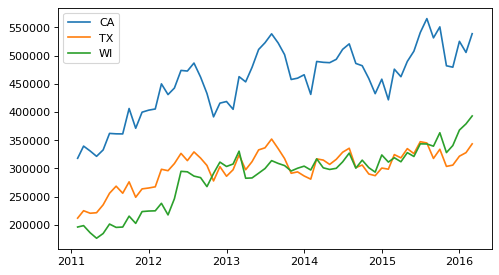

In [ ]:
X = sale2
X = X.groupby(X.columns.map(lambda x : x if type(x) == str else x.strftime('%Y-%m')),axis=1).sum()
for c in ((X.columns)[:-6]):
    x= datetime.datetime.strptime(c, '%Y-%m').date()
    X.rename(columns={c:x},inplace=True)


F = X.groupby(['state_id'])[(X.columns)[:-6]].sum()
plt.figure(num=None, figsize=(7, 4), dpi=80, facecolor='w', edgecolor='k')
for i in range(3):
    plt.plot(F.iloc[i,1:-1],label=F.index[i])
    plt.legend(loc='best')
plt.show()

### *4.Biểu đồ doanh số bán hàng theo phân loại sản phẩm*


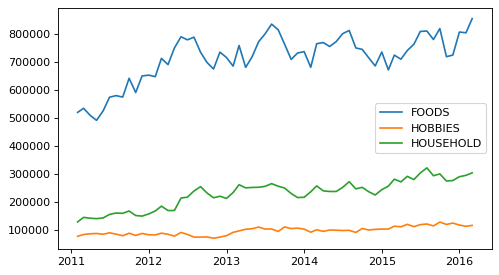

In [ ]:
F = X.groupby(['cat_id'])[(X.columns)[:-6]].sum()
plt.figure(num=None, figsize=(7, 4), dpi=80, facecolor='w', edgecolor='k')
for i in range(3):
    plt.plot(F.iloc[i,1:-1],label=F.index[i])
    plt.legend(loc='best')
plt.show()

### *1.Sales of first 5 items as time series*


### *1.Sales of first 5 items as time series*
